# Brainsteaser - Air Force One 

One hundred people are in line to board the Airforce One. There are exactly 100 seats on the plane. Each passanger has a ticket. Each ticket assigns the passenger a specific seat. The passengers board the aircraft one at a time. GW is the first to board the plane. He cannot read, and does not know which seat is his, so he picks a seat at random and pretends that it is his proper seat. 

The remaining passengers board the plane one at time. If one of them finds their assigned seat empty, they will seat in it. If they find that their seat is already taken, they pick a seat at random. This continues until everyone has boarded and taken a seat.

What is the probability that the last person to board the plane sits in their proper seat?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm

## Simulation Function

In [2]:
def simulation(num_times,num_passengers):

    # output variables
    dict_distribution = dict()
    df_count = pd.DataFrame(columns = ["0","1"])

    # auxiliary variables
    count_0 = 0
    count_1 = 0

    # iteration on the number of simulations
    for i in tqdm(range(num_times)):

        # iteration variable
        dict_seats = dict.fromkeys(range(1,num_passengers+1),0)

        # first passenger random choice
        dict_seats[random.randint(1,num_passengers)] = 1

        # interation on the number of passengers rather than the first one
        for j in range(2,num_passengers+1):

            # seating rules
            if dict_seats[j] == 0:
                dict_seats[j] = j
            else:

                # seats available for a misplaced passenger variable
                list_rand = list()

                # iteration to get the available seats
                for k in range(1,num_passengers+1):
                    if dict_seats[k] == 0:
                        list_rand.append(k)
                
                # random choice
                dict_seats[random.choices(list_rand,k=1)[0]] = j
        
        # count result
        if dict_seats[num_passengers] != num_passengers:
            count_0 += 1
            df_count.loc[i,["0","1"]] = float(count_0/(count_0+count_1)),float(count_1/(count_0+count_1))

        else:
            count_1 += 1
            df_count.loc[i,["0","1"]] = float(count_0/(count_0+count_1)),float(count_1/(count_0+count_1))

        # distribuition result
        dict_distribution[i] = list(dict_seats.values())
        

    return df_count,dict_distribution                

## Convergence Analysis

100%|██████████| 10000/10000 [00:08<00:00, 1117.91it/s]


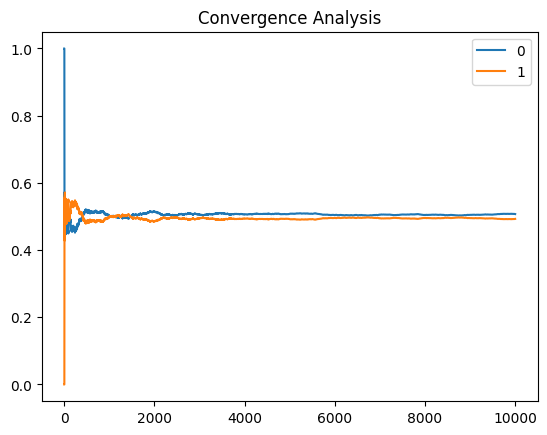

In [3]:
num_times = 10000
num_passengers = 100
df_count,dict_distribution = simulation(num_times,num_passengers)

for name in df_count.columns:
    plt.plot(df_count[name])
    plt.title("Convergence Analysis")
    plt.legend(df_count.columns)
plt.show()

## Distribution Analysis

In [4]:
list_distribution = [0]*len(dict_distribution[0])
for key in dict_distribution.keys():
    for enum in range(len(dict_distribution[key])):
        if dict_distribution[key][enum] == enum+1:
            list_distribution[enum] += 1 / len(dict_distribution.keys())

px.bar(list_distribution, title = "Distribution Analysis")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f062523-7425-4cba-9cee-53a7fd40ef88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>